## Lab 3 Supervised Learning - Classification on Iris Dataset

During this lab, we will train classification algorithms on the Iris Dataset. 
This dataset contains 3 classes of 50 examples each, 
each class refers to a type of iris plant. One class is linearly separable from the two others, and the two others are not linearly separable between them.
The Iris dstaset contains 4 input features: sepal length, sepal width, petal length and petal width.

The Objectives of this lab are:

1. Observe Logistic Regression and SVM classification models in action
2. Observe the decision boundary of Logistic Regression and SVM algorithms for binary classification
3. Observe the decision boundary of the Logistic Regression and SVM algorithms for a Multi-class classification
4. Learn how to consult the documentation of Scikit learn implementations


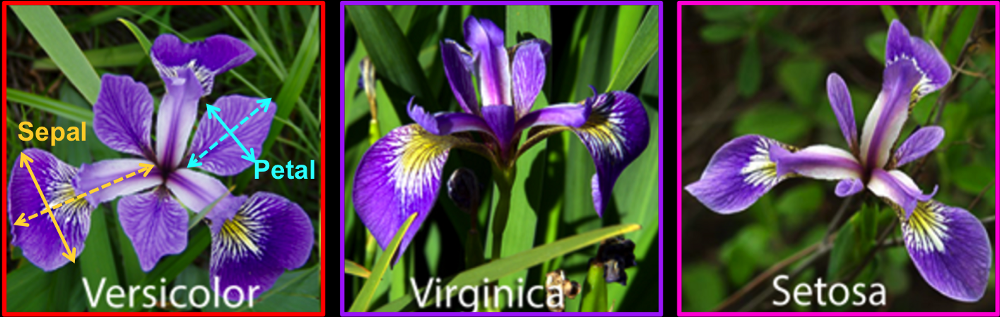

In [1]:

import numpy as np
# pandas for data structure et data frames
import pandas as pd
# Import matplotlib for data visualisation
import matplotlib.pyplot as plt
from sklearn import datasets
# scikit-learn metrics module for our models' evaluations
from sklearn import metrics

Import Iris dataset from scikit-learn. 

In [2]:
# import dataset
iris = datasets.load_iris()

Let's see what this dataset contains

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


Explanations:

data: the flower data

target: flower classes

target_names: classes names (characteristic variables)

feature_names: features names (characteristic variables)

DESCR: Dataset description

To know more about the dataset, we display DESCR


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

let's display targets and features names

In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


Let's display the number of examples per class as a bar chart

<BarContainer object of 3 artists>

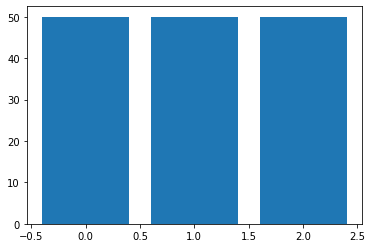

In [9]:
import collections
w=collections.Counter(iris.target)
plt.bar(w.keys(), w.values())

We put our data in a pandas dataframe for a better manipulation:

In [11]:
#creating data frame for pandas
irisdata = pd.DataFrame(iris['data'], columns=iris['feature_names'])

We add a column iris_type to put the class of each flower

In [12]:
irisdata['iris_type'] = iris.target
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Let's visualize our data.

We will visualize the classes with  only two features.

Let's start by visualizing our classes with two features 'sepal length (cm)' and 'sepal width (cm)

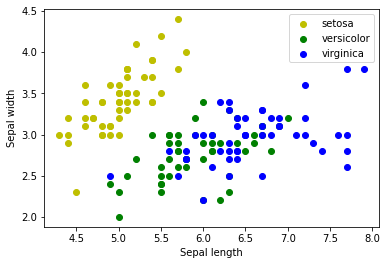

In [13]:
# plot the dataset and color the by class label
plt.scatter(irisdata['sepal length (cm)'][irisdata['iris_type'] == 0], irisdata['sepal width (cm)'][irisdata['iris_type'] == 0], 
            c='y', label = 'setosa')
plt.scatter(irisdata['sepal length (cm)'][irisdata['iris_type'] == 1], irisdata['sepal width (cm)'][irisdata['iris_type'] == 1], 
            c='g',label = 'versicolor')
plt.scatter(irisdata['sepal length (cm)'][irisdata['iris_type'] == 2], irisdata['sepal width (cm)'][irisdata['iris_type'] == 2], 
            c='b',label = 'virginica')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.legend()

and now, let's visualize the other features (petal length) and (petal width)

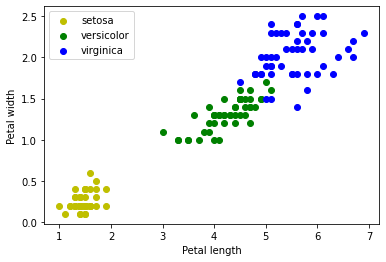

In [14]:
# plot the dataset and color the by class label
plt.scatter(irisdata['petal length (cm)'][irisdata['iris_type'] == 0], irisdata['petal width (cm)'][irisdata['iris_type'] == 0],
            c='y', label = 'setosa')
plt.scatter(irisdata['petal length (cm)'][irisdata['iris_type'] == 1], irisdata['petal width (cm)'][irisdata['iris_type'] == 1],
            c='g', label = 'versicolor')
plt.scatter(irisdata['petal length (cm)'][irisdata['iris_type'] == 2], irisdata['petal width (cm)'][irisdata['iris_type'] == 2],
            c='b', label = 'virginica')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

# Part 1: Binary Classification


 in a first step we consider only two classes, and two features.

We remove the class 'virginica', and we keep the two features 'sepal length (cm)' and 'sepal width (cm)'.


In [15]:
irisdataB = irisdata[irisdata['iris_type'] != 2]

In [16]:
irisdataB.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
X = irisdataB[['sepal length (cm)','sepal width (cm)']]
y = irisdataB['iris_type']

let's check that's everything is good

In [18]:
print(X.head(5))
print(y.unique())

   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
[0 1]


let's visualize data

Text(0, 0.5, 'Sepal width')

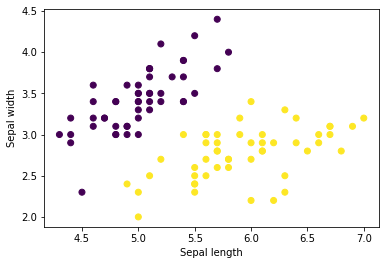

In [19]:
# plot the dataset and color the by class label
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [20]:
print(y.shape)
print(X.shape)

(100,)
(100, 2)


Let's divide our data into train and test dataset

In [21]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [22]:
print(X_train.shape)
print(y_train.shape)

(85, 2)
(85,)


## Logistic Regression

We train a logistic regression model to separate the two classes.

We specify the optimization procedure ('solver'). This choice depends on the task we ask the Logistic Regression algorithm to perform.

We choose 'liblinear' which is adapted to small datasets and is a variation of the Descending Gradient algorithm.


In [23]:
from sklearn.linear_model import LogisticRegression
#Create a Logistic Regression Classifier
classifierLR = LogisticRegression( solver='liblinear', random_state=0 )
#Train the model 
classifierLR.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

let's observe the predictions

In [24]:
classifierLR.predict_proba(X_train)[:5]

array([[0.79506778, 0.20493222],
       [0.97069605, 0.02930395],
       [0.91638962, 0.08361038],
       [0.97624319, 0.02375681],
       [0.81618797, 0.18381203]])

In [25]:
classifierLR.predict(X_train)[:5]

array([0, 0, 0, 0, 0])

By default, logistic regression is implemented in scikit learn to return classes with the highest probability (threshold = 0.5).

Let's visualize the decision boundary:

In [26]:
###### """Plot the decision function for a 2D LogReg model"""
def plot_decision_function(model, ax=None):    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape) 
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='b',
               levels=[0], alpha=0.5,
               linestyles=[ '-'])
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

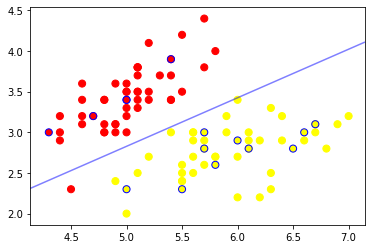

In [20]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test,edgecolors='b', s=50, cmap='autumn')
plot_decision_function(classifierLR)

In [21]:
#Predict the response for test dataset
y_pred_test = classifierLR.predict(X_test)

In [22]:
print(metrics.classification_report(y_test, y_pred_test))
#la matrice de contingence
print(metrics.confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[ 5  0]
 [ 0 10]]


## SVM

Let's train an SVM model to separate the two classes.

There are 3 implementations of SVM classifiers on Scikit learn:

+SVC: suitable for small datasets. Supports different types of kernels. Implements the "one-against-one" approach for multi-class classification.
+NuSVC: similar to SVC, slightly different parameters and has a different mathematical formulation.
+LinearSVC: Implements SVM with a linear kernel. Suitable for large datasets. Implements the "one-vs-the-rest" approach for multi-class classification.

Because our dataset is small, we use SVC.

We specify the kernel (default is 'rbf') and the value of the C parameter (default is 1).

The 'solver' (optimization algorithm) used for SVC by Scikit Learn is SMO


In [39]:
from sklearn.svm import SVC # "Support vector classifier"
classifierSVM = SVC(kernel='linear', C=0.1)
classifierSVM.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

We visualize the decision boundary, the margin, the support vectors (green outline) and test data (blue outline).

In [40]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=2, facecolors='none', color='g');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

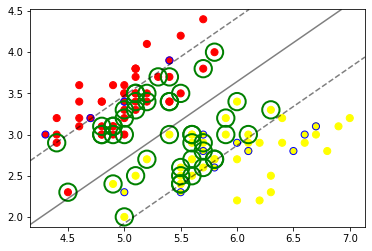

In [41]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test,edgecolors='b', s=50, cmap='autumn')
plot_svc_decision_function(classifierSVM)

In [42]:
classifierSVM.support_vectors_

array([[4.8, 3.1],
       [4.4, 2.9],
       [4.8, 3. ],
       [5.3, 3.7],
       [5.2, 3.5],
       [5.7, 3.8],
       [4.9, 3. ],
       [4.5, 2.3],
       [5.1, 3.5],
       [5.1, 3.5],
       [4.9, 3.1],
       [5.2, 3.4],
       [5. , 3.2],
       [5.1, 3.3],
       [5.4, 3.7],
       [5.4, 3.4],
       [5.8, 4. ],
       [5. , 3.3],
       [5.4, 3.4],
       [5. , 3. ],
       [5.1, 3.4],
       [4.8, 3. ],
       [5.5, 3.5],
       [4.9, 3.1],
       [5.7, 2.8],
       [5.8, 2.7],
       [5. , 2. ],
       [5.5, 2.4],
       [5.5, 2.6],
       [6.3, 3.3],
       [5.9, 3. ],
       [6.1, 3. ],
       [5.2, 2.7],
       [5.6, 3. ],
       [4.9, 2.4],
       [5.7, 2.6],
       [6. , 3.4],
       [5.4, 3. ],
       [5.5, 2.5],
       [5.1, 2.5],
       [5.6, 2.5],
       [5.6, 2.7],
       [5.5, 2.4],
       [5.6, 3. ],
       [5.9, 3.2],
       [5.7, 2.9],
       [5.8, 2.7],
       [5.6, 2.9]])

In [43]:
#Predict the response for test dataset
y_pred_test = classifierSVM.predict(X_test)

print(metrics.classification_report(y_test, y_pred_test))
#la matrice de contingence
print(metrics.confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[ 5  0]
 [ 0 10]]


## SVM with a non linear kernel

Let's train a SVM classifier with an 'rbf' (radial basis function) kernel.

In [44]:
classifierSVMrbf = SVC(kernel='rbf', C=10, gamma='auto')
classifierSVMrbf.fit(X_train, y_train)

SVC(C=10, gamma='auto')

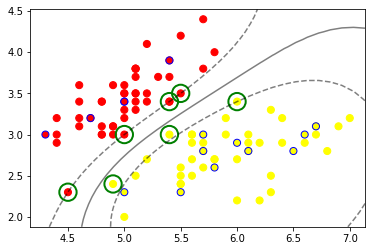

In [45]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test,edgecolors='b', s=50, cmap='autumn')
plot_svc_decision_function(classifierSVMrbf)

In [46]:
#Predict the response for test dataset
y_pred_test = classifierSVMrbf.predict(X_test)

print(metrics.classification_report(y_test, y_pred_test))
#la matrice de contingence
print(metrics.confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[ 5  0]
 [ 0 10]]


# Part 2: Multi-Class Classification

Let's now consider all our classes, but again with only two features in order to facilitate the visualization

In [47]:
X = irisdata[['sepal length (cm)','sepal width (cm)']]
y = irisdata['iris_type']
print(X.head(5))
print(y.unique())

   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
[0 1 2]


Text(0, 0.5, 'Sepal width')

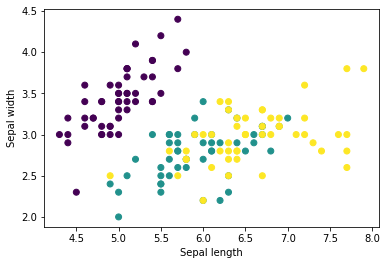

In [48]:
# plot the dataset and color the by class label
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [49]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
print(X_train.shape)
print(y_train.shape)

(127, 2)
(127,)


## Logistic Regression

We specify the 'One Vs Rest' ('ovr') method for multi-class management

In [49]:
from sklearn.linear_model import LogisticRegression
#Create a Logistic Regression Classifier
classifierLR = LogisticRegression(random_state=0, multi_class ='ovr', warm_start='false' , solver='liblinear')
#Train the model 
classifierLR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0,
                   warm_start='false')

We display the probabilities

In [50]:
classifierLR.predict_proba(X_train)[:5]

array([[0.81618797, 0.18381203],
       [0.07053861, 0.92946139],
       [0.97069605, 0.02930395],
       [0.95924136, 0.04075864],
       [0.09688985, 0.90311015]])

In [51]:
classifierLR.predict(X_train)[:5]

array([0, 1, 0, 0, 1])

In [52]:
#Predict the response for test dataset
y_pred_test = classifierLR.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test))
#la matrice de contingence
print(metrics.confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.69      1.00      0.81        11
           2       0.00      0.00      0.00         5

    accuracy                           0.78        23
   macro avg       0.56      0.67      0.60        23
weighted avg       0.63      0.78      0.69        23

[[ 7  0  0]
 [ 0 11  0]
 [ 0  5  0]]


C:\Users\h\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's visualize the decision boundaries

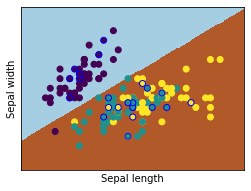

In [53]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['sepal length (cm)'].min() - .5, X_train['sepal length (cm)'].max() + .5
y_min, y_max = X_train['sepal width (cm)'].min() - .5, X_train['sepal width (cm)'].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifierLR.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z,cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# Plot also the test points
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test, edgecolors='b')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## SVM

The multi-class strategy implemented for SVC is 'one-vs-one'. 

Let's start with a linear kernel

In [54]:
#Create a SVM Classifier
classifierSVM = SVC(kernel='linear', C=10)
classifierSVM.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [55]:
classifierSVM.predict(X_train)[:5]

array([0, 1, 0, 0, 1])

In [57]:
#Predict the response for test dataset
y_pred_test_SVM = classifierSVM.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test_SVM))
#la matrice de contingence
print(metrics.confusion_matrix(y_test, y_pred_test_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.70      0.64      0.67        11
           2       0.33      0.40      0.36         5

    accuracy                           0.70        23
   macro avg       0.68      0.68      0.68        23
weighted avg       0.71      0.70      0.70        23

[[7 0 0]
 [0 7 4]
 [0 3 2]]


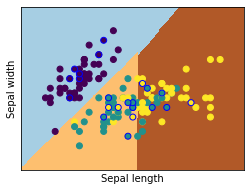

In [56]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['sepal length (cm)'].min() - .5, X_train['sepal length (cm)'].max() + .5
y_min, y_max = X_train['sepal width (cm)'].min() - .5, X_train['sepal width (cm)'].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifierSVM.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# Plot also the test points
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test, edgecolors='b')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Now let's use an rbf kernel for SVM

In [57]:
classifierSVMrbf = SVC(kernel='rbf', C=10, gamma=0.7)
classifierSVMrbf.fit(X_train, y_train)

SVC(C=10, gamma=0.7)

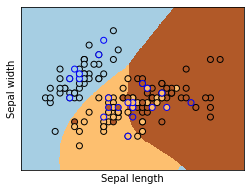

In [58]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['sepal length (cm)'].min() - .5, X_train['sepal length (cm)'].max() + .5
y_min, y_max = X_train['sepal width (cm)'].min() - .5, X_train['sepal width (cm)'].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifierSVMrbf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
# Plot also the test points
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test, edgecolors='b', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [59]:
#Predict the response for test dataset
y_pred_test_SVM = classifierSVMrbf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test_SVM))
#la matrice de contingence
print(metrics.confusion_matrix(y_test, y_pred_test_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.60      0.27      0.37        11
           2       0.27      0.60      0.37         5

    accuracy                           0.57        23
   macro avg       0.62      0.62      0.58        23
weighted avg       0.65      0.57      0.57        23

[[7 0 0]
 [0 3 8]
 [0 2 3]]
